In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("white")
%matplotlib inline

In [71]:
df = pd.read_csv('Happiness_2017.csv')

## About the Data


The World Happiness Report is a landmark survey of the state of global happiness. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

The Dataset can be found at _[Kaggle](https://www.kaggle.com/unsdsn/world-happiness)_

## Format the Dataset

The dataset's labels are a little off and there may be some missing values. First I need to format the dataset so that it is easier to work and to remove and missing values.

In [72]:
df.columns =['country', 'happiness_rank', 'happiness_score', 'whiskerhi', 'whiskerlo', 'gdp_per_capita', 
             'family', 'life_expectancy', 'freedom', 'generosity', 'gov_corruption', 'dystopia_residual']

df = df.loc[:, ['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'family', 'life_expectancy', 
                 'freedom', 'generosity', 'gov_corruption', 'dystopia_residual']]

df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [73]:
df.dropna()
df.shape

(155, 10)

## Select Variables

The Outcome Varriable for this expiremnet will be Happiness Score. 

The Continuos Variables that will act as the basis of features will be GDP Per Capita, Family, Freedom and Generosity.

The only Categorical Variable in the dataset is Country, which isn't a great Categorical Variable for the purpose of this expirement. So, I will create a Categorical Variable out of the Life Expectancy. Assigning a 1 to countries with a life expectancy equal to or greater than 70 and a 0 to countries with a life expectancy less than 70. 


In [75]:
df['life_over70'] = np.where(df2['life_expectancy']>=.70, 1, 0)

Exploring the data: Univariate
After defining the research question, your next step toward building a model is to get to know the individual variables through inspection of the data file itself, visualizations and univariate descriptive statistics ("univariate" means pertaining to one variable, rather than many). You’ll want to answer questions such as:

How many variables do I have?
How many datapoints?
Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
Do I have missing data? If so, how much?
How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.

## Exploring the Data: Univariate

In [76]:
df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,life_over70
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1


In [84]:
df.happiness_score.describe()

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: happiness_score, dtype: float64

In [85]:
df.gdp_per_capita.describe()

count    155.000000
mean       0.984718
std        0.420793
min        0.000000
25%        0.663371
50%        1.064578
75%        1.318027
max        1.870766
Name: gdp_per_capita, dtype: float64

In [86]:
df.family.describe()

count    155.000000
mean       1.188898
std        0.287263
min        0.000000
25%        1.042635
50%        1.253918
75%        1.414316
max        1.610574
Name: family, dtype: float64

In [87]:
df.life_expectancy.describe()

count    155.000000
mean       0.551341
std        0.237073
min        0.000000
25%        0.369866
50%        0.606042
75%        0.723008
max        0.949492
Name: life_expectancy, dtype: float64

In [88]:
df.freedom.describe()

count    155.000000
mean       0.408786
std        0.149997
min        0.000000
25%        0.303677
50%        0.437454
75%        0.516561
max        0.658249
Name: freedom, dtype: float64

In [89]:
df.generosity.describe()

count    155.000000
mean       0.246883
std        0.134780
min        0.000000
25%        0.154106
50%        0.231538
75%        0.323762
max        0.838075
Name: generosity, dtype: float64

## Exploring the Data: Bivariate

Next we will explore the data with the Bivariate Methods we have learned so far. First, I create a new dataframe that only includes the variables we are going to explore. 

In [53]:
df2 = df.loc[:, ['happiness_score', 'gdp_per_capita', 'family', 'life_expectancy', 
                 'freedom', 'generosity', 'life_over70']]

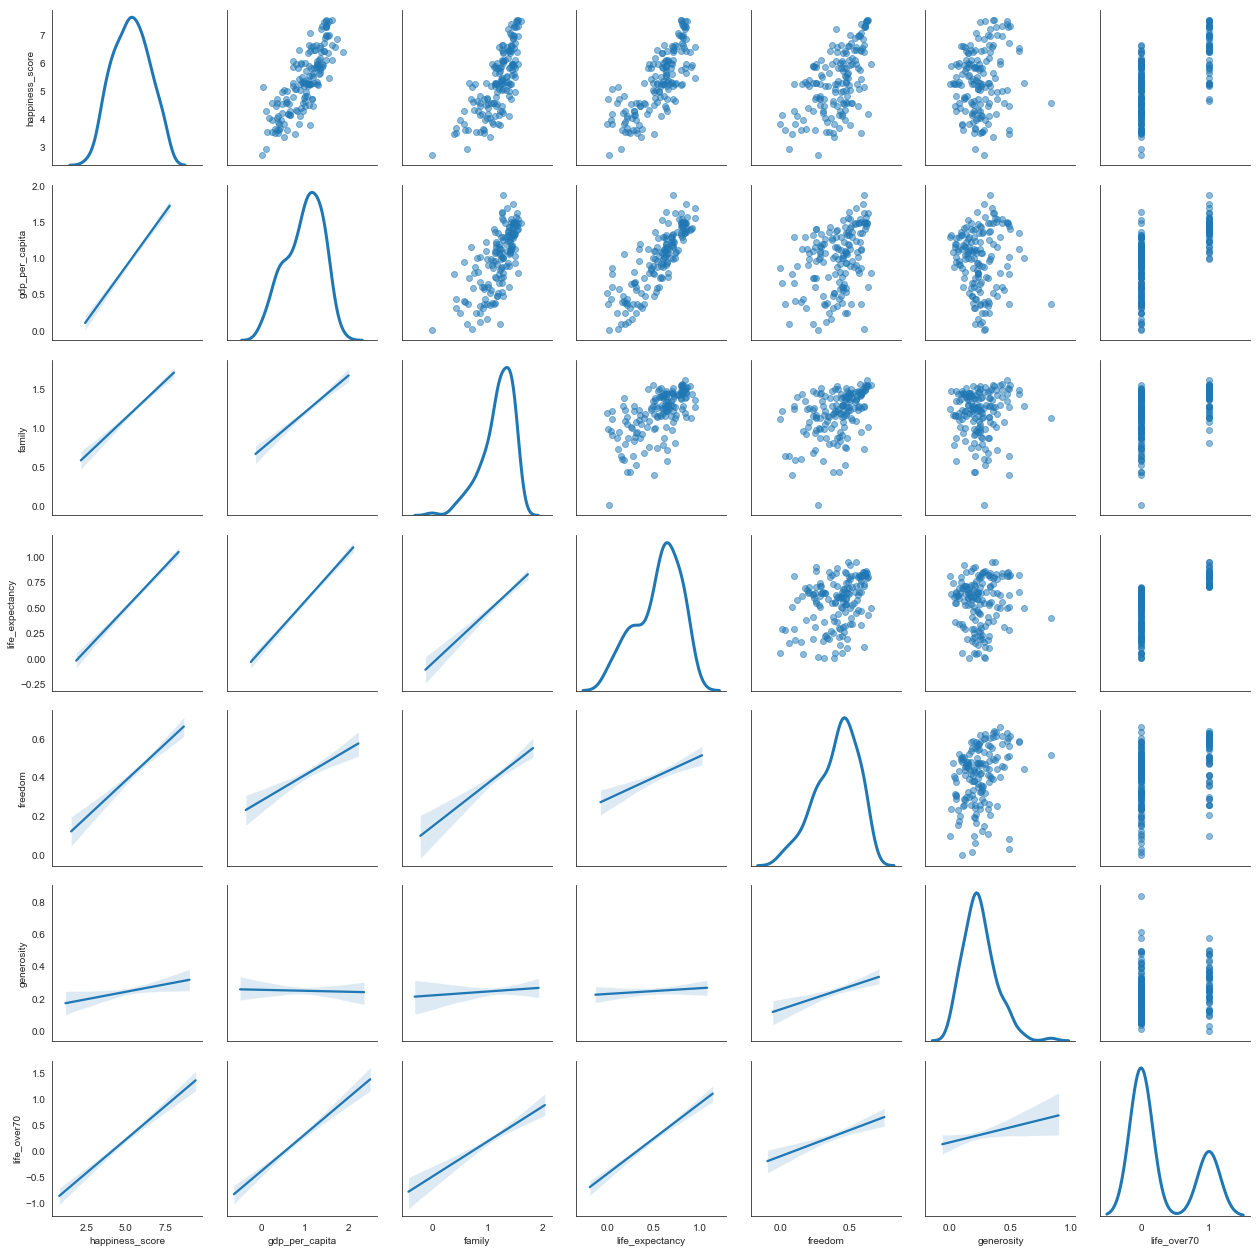

In [54]:
g = sns.PairGrid(df2, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                 happiness_score  gdp_per_capita    family  life_expectancy  \
happiness_score         1.000000        0.812469  0.752737         0.781951   
gdp_per_capita          0.812469        1.000000  0.688296         0.843077   
family                  0.752737        0.688296  1.000000         0.612080   
life_expectancy         0.781951        0.843077  0.612080         1.000000   
freedom                 0.570137        0.369873  0.424966         0.349827   
generosity              0.155256       -0.019011  0.051693         0.063191   
life_over70             0.628828        0.639601  0.419700         0.697606   

                  freedom  generosity  life_over70  
happiness_score  0.570137    0.155256     0.628828  
gdp_per_capita   0.369873   -0.019011     0.639601  
family           0.424966    0.051693     0.419700  
life_expectancy  0.349827    0.063191     0.697606  
freedom          1.000000    0.316083     0.325963  
generosity       0.316083    1.000000     0.16748

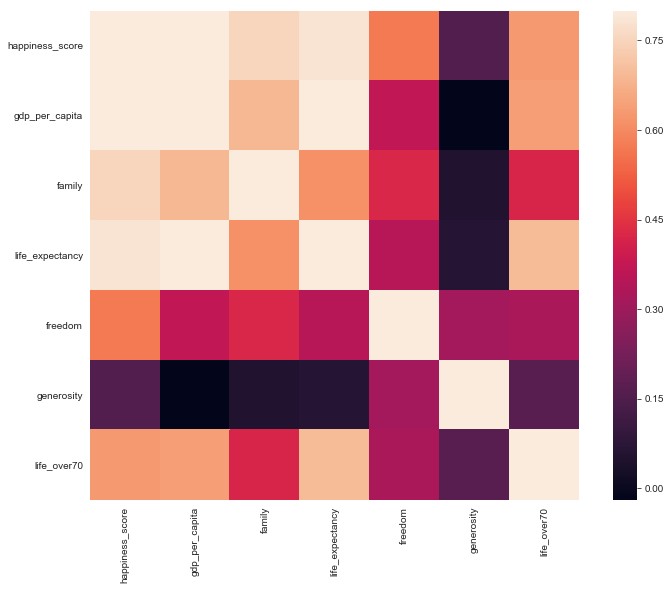

In [55]:
corrmat2 = df2.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

As we can see, the factors that correlate the highest with Happiness Score are GDP Per Capita and Life Expectancy. 

In [90]:
df.life_over70.value_counts()

0    108
1     47
Name: life_over70, dtype: int64

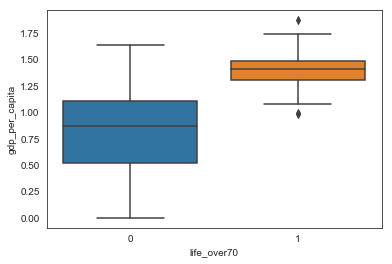

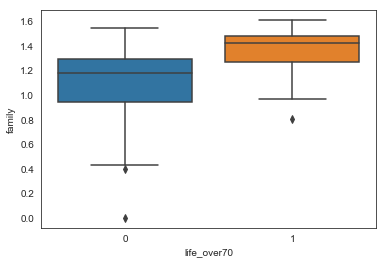

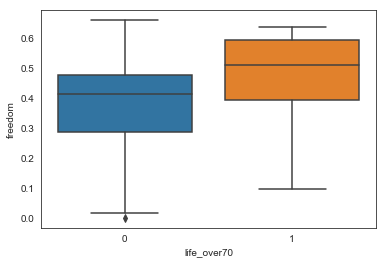

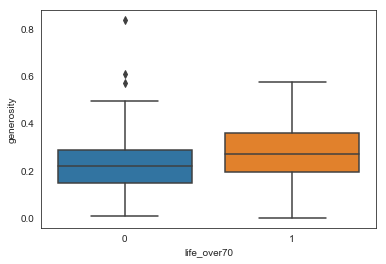

In [57]:
sns.boxplot(x = df2['life_over70'], y = df2['gdp_per_capita'])
plt.show()

sns.boxplot(x = df2['life_over70'], y = df2['family'])
plt.show()

sns.boxplot(x = df2['life_over70'], y = df2['freedom'])
plt.show()
                                            
sns.boxplot(x = df2['life_over70'], y = df2['generosity'])
plt.show()                                      

From the Box Plots, we can see that Countries' whose populations have a life expectancy over 70 years old have higher scores in Generosity, Freedom, Family, and GDP Per Capita. 

GDP Per Capita appears to play a particularly important role in countries with Life Expectancy over 70. It appears that most countries with lower GDP per Capita have life expectancy under 70. 

## Create 10 New Features



### Feature 1:

Create a new Categorical Variable of Nordic Countries. These countries include Norway, Sweden, Denmark, Finland and Iceland. 

In [166]:
df['Nordic'] = np.where((df['country'].isin(['Norway', 'Sweden', 'Denmark', 'Finland', 'Iceland'])), 1, 0)

df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,life_over70,Nordic,Life_Expectancy_Over70,Major War,Life_Expectancy_Over75,gdp_life_expectancy,family_life_expectancy,ungrateful,singles,less_family
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,1,1,0,1,1.268067,1.11725,0.476063,0.07705,0.07705


### Feature 2:

Create a new categorical variable for War Torn countries that have had 10,000+ Casualities in the past year. These countries include Iraq, Syria and Yemen.

In [167]:
df['Major War'] = np.where((df['country'].isin(['Iraq', 'Syria', 'Yemen'])), 1, 0)

df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,life_over70,Nordic,Life_Expectancy_Over70,Major War,Life_Expectancy_Over75,gdp_life_expectancy,family_life_expectancy,ungrateful,singles,less_family
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,1,1,0,1,1.268067,1.11725,0.476063,0.07705,0.07705


### Feature 3:

Create a new Categorical Variable for Life Expectancy of over 75.

In [168]:
df['Life_Expectancy_Over75'] = np.where(df['life_expectancy']>=.75, 1, 0)
df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,life_over70,Nordic,Life_Expectancy_Over70,Major War,Life_Expectancy_Over75,gdp_life_expectancy,family_life_expectancy,ungrateful,singles,less_family
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,1,1,0,1,1.268067,1.11725,0.476063,0.07705,0.07705


### Feature 4:

GDP and Life Expectancy are highly correlated. Average the two to create a new feature.

In [169]:
means = df[['gdp_per_capita','life_expectancy']].mean(axis=0)
stds = df[['gdp_per_capita','life_expectancy']].std(axis=0)
df['gdp_life_expectancy'] = ((df[['gdp_per_capita','life_expectancy']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['gdp_per_capita','life_expectancy']]
plotdf['gdp_life_expectancy'] = df['gdp_life_expectancy'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                     gdp_per_capita  life_expectancy  gdp_life_expectancy
gdp_per_capita             1.000000         0.843077             0.959968
life_expectancy            0.843077         1.000000             0.959968
gdp_life_expectancy        0.959968         0.959968             1.000000


In [144]:
df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,life_over70,Nordic,Life_Expectancy_Over70,Major War,Life_Expectancy_Over75,gdp_life_expectancy
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,1,1,0,1,1.268067


### Feature 5:

In [170]:
means = df[['family','life_expectancy']].mean(axis=0)
stds = df[['family','life_expectancy']].std(axis=0)
df['family_life_expectancy'] = ((df[['family','life_expectancy']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['family','life_expectancy']]
plotdf['family_life_expectancy'] = df['family_life_expectancy'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                          family  life_expectancy  family_life_expectancy
family                  1.000000         0.612080                0.897797
life_expectancy         0.612080         1.000000                0.897797
family_life_expectancy  0.897797         0.897797                1.000000


### Feature 6:

Text(0.5, 1.0, 'Square root')

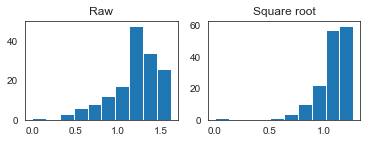

In [138]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['family'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.sqrt(df['family'].dropna()))
plt.title('Square root')


### Feature 7:

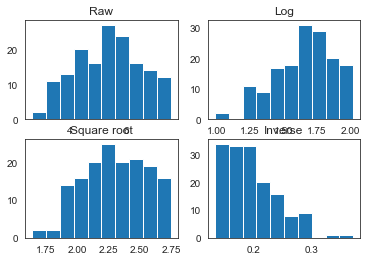

In [171]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['happiness_score'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['happiness_score'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['happiness_score'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['happiness_score'].dropna())
plt.title('Inverse')
plt.show()

### Feature 8:

In [147]:
df.head(1)

,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,life_over70,Nordic,Life_Expectancy_Over70,Major War,Life_Expectancy_Over75,gdp_life_expectancy,family_life_expectancy
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,1,1,0,1,1.268067,1.11725


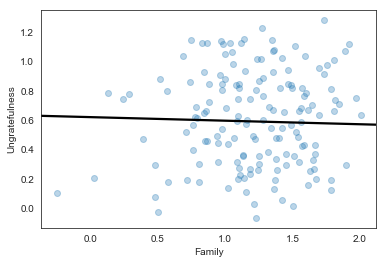

In [172]:
df['ungrateful'] = max(df['generosity']) - df['generosity']

sns.regplot(
    df['family'],
    df['ungrateful'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Family')
plt.ylabel('Ungratefulness')
plt.show()

### Feature 9:

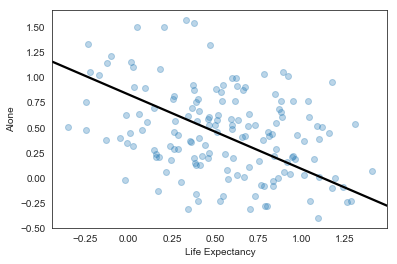

In [173]:
df['less_family'] = max(df['family']) - df['family']

sns.regplot(
    df['life_expectancy'],
    df['less_family'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Life Expectancy')
plt.ylabel('Alone')
plt.show()

### Feature 10:

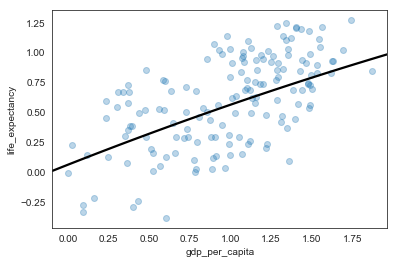

In [176]:
sns.regplot(
    df['gdp_per_capita'],
    y=df['life_expectancy'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()


df['gdp_squared'] = df['gdp_per_capita'] * df['gdp_per_capita']

## All New Features

In [180]:
df.head(3)


,country,happiness_rank,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_corruption,dystopia_residual,...,Nordic,Life_Expectancy_Over70,Major War,Life_Expectancy_Over75,gdp_life_expectancy,family_life_expectancy,ungrateful,singles,less_family,gdp_squared
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,...,1,1,0,1,1.268067,1.117250,0.476063,0.077050,0.077050,2.612953
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,...,1,1,0,1,1.100099,1.139231,0.482795,0.059452,0.059452,2.197459
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,...,1,1,0,1,1.184463,1.329155,0.362535,0.000000,0.000000,2.192274


In [187]:
df_features = df.loc[:, ['happiness_score', 'Life_Expectancy_Over70', 'Nordic', 'Major War', 'Life_Expectancy_Over75', 'gdp_life_expectancy',
                         'family_life_expectancy', 'ungrateful', 'singles', 'less_family', 'gdp_squared']]
                         
df_features.head(1)

,happiness_score,Life_Expectancy_Over70,Nordic,Major War,Life_Expectancy_Over75,gdp_life_expectancy,family_life_expectancy,ungrateful,singles,less_family,gdp_squared
0,7.537,1,1,0,1,1.268067,1.11725,0.476063,0.07705,0.07705,2.612953


                        happiness_score  Life_Expectancy_Over70    Nordic  \
happiness_score                1.000000                0.628828  0.341513   
Life_Expectancy_Over70         0.628828                1.000000  0.276759   
Nordic                         0.341513                0.276759  1.000000   
Major War                     -0.187307               -0.092678 -0.025649   
Life_Expectancy_Over75         0.627153                0.818665  0.338062   
gdp_life_expectancy            0.830455                0.696485  0.222736   
family_life_expectancy         0.854696                0.622248  0.238046   
ungrateful                    -0.155256               -0.167487 -0.160171   
singles                       -0.752737               -0.419700 -0.225609   
less_family                   -0.752737               -0.419700 -0.225609   
gdp_squared                    0.809617                0.695778  0.261359   

                        Major War  Life_Expectancy_Over75  \
happiness_scor

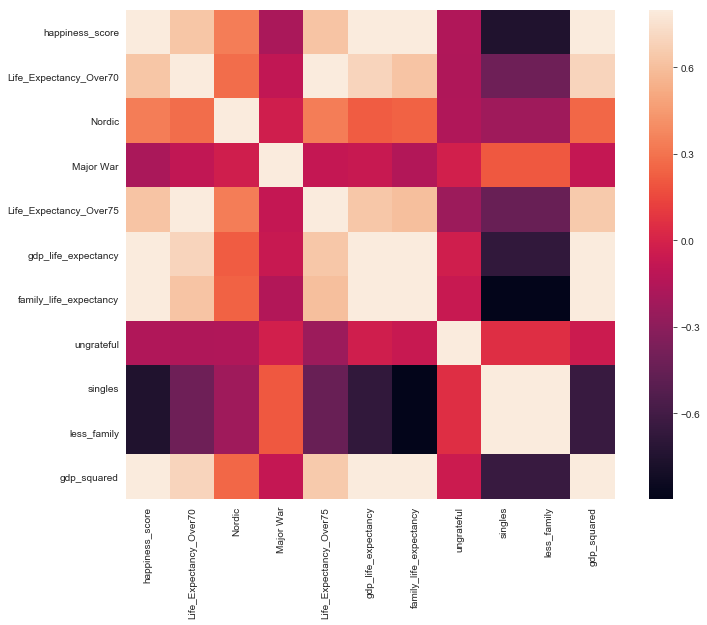

In [188]:
corrmat3 = df_features.corr()
print(corrmat3)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat3, vmax=.8, square=True)
plt.show()

# Use Filtering Methods to Choose 5 Best Features

The 5 best features to look at that lead to an outcome of a high Happiness Score are:
-  Life Expectancy Over 70
-  Life Expectancy Over 75
-  Major War (Lack there of)
-  GDP & Life Expectancy
-  Family & Life Expectancy

## Convert All Values to Same Range (EXTRA)

In [189]:
from sklearn import preprocessing

df_num = df_features.select_dtypes(include=[np.number]).dropna()

names=df_num.columns

df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

print(df_scaled.describe())

       happiness_score  Life_Expectancy_Over70      Nordic     Major War  \
count     1.550000e+02              155.000000  155.000000  1.550000e+02   
mean     -1.833659e-16                0.000000    0.000000 -4.584147e-17   
std       1.003241e+00                1.003241    1.003241  1.003241e+00   
min      -2.359949e+00               -0.659686   -0.182574 -1.404879e-01   
25%      -7.525169e-01               -0.659686   -0.182574 -1.404879e-01   
50%      -6.653176e-02               -0.659686   -0.182574 -1.404879e-01   
75%       6.629099e-01                1.515873   -0.182574 -1.404879e-01   
max       1.935996e+00                1.515873    5.477226  7.118052e+00   

       Life_Expectancy_Over75  gdp_life_expectancy  family_life_expectancy  \
count            1.550000e+02         1.550000e+02            1.550000e+02   
mean             9.168293e-17        -4.584147e-17            4.584147e-17   
std              1.003241e+00         1.003241e+00            1.003241e+00   
min

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


                        happiness_score  Life_Expectancy_Over70    Nordic  \
happiness_score                1.000000                0.628828  0.341513   
Life_Expectancy_Over70         0.628828                1.000000  0.276759   
Nordic                         0.341513                0.276759  1.000000   
Major War                     -0.187307               -0.092678 -0.025649   
Life_Expectancy_Over75         0.627153                0.818665  0.338062   
gdp_life_expectancy            0.830455                0.696485  0.222736   
family_life_expectancy         0.854696                0.622248  0.238046   
ungrateful                    -0.155256               -0.167487 -0.160171   
singles                       -0.752737               -0.419700 -0.225609   
less_family                   -0.752737               -0.419700 -0.225609   
gdp_squared                    0.809617                0.695778  0.261359   

                        Major War  Life_Expectancy_Over75  \
happiness_scor

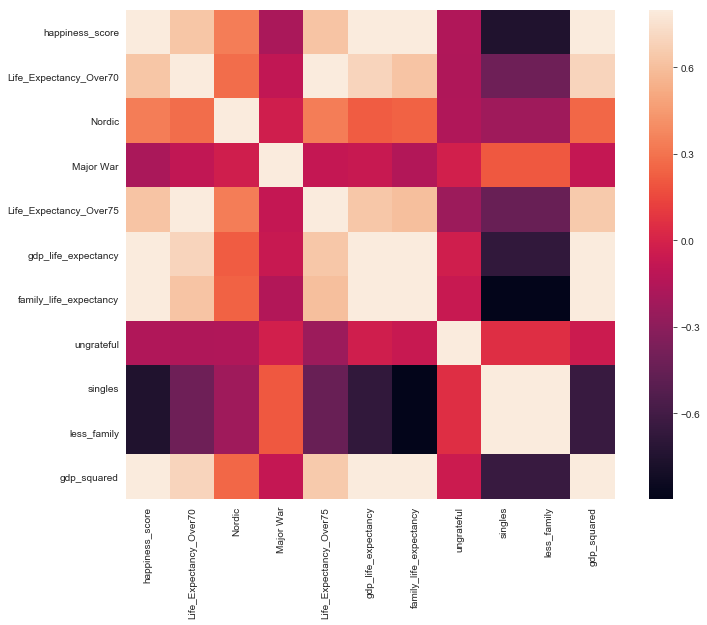

In [191]:
corrmat4 = df_scaled.corr()
print(corrmat4)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat4, vmax=.8, square=True)
plt.show()